# Imports

In [1]:
## imports
import pandas as pd
import ast
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
from embeddings import * 
from user import *
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import random

# Create Semantic Clusters

## Data

In [2]:
## load data
df = pd.read_csv("vocab_with_embeddings.csv", encoding='utf-8', index_col=0, keep_default_na=False)
datas = {}
for language in ["en", "fr", "es", "de", "ru", "pl"]:
    df[language + "_embedding"] = df[language + "_embedding"].apply(ast.literal_eval)
    datas[language] = df[language + "_embedding"].to_list()

print(type(datas["fr"]))
    
for lang, embeds in datas.items():
    print(f"{lang}: {[e[:3] for e in embeds[:2]]}") 

<class 'list'>
en: [[0.02009648270905018, -0.03218023106455803, -0.030821779742836952], [0.017301591113209724, -0.014794202521443367, -0.037032466381788254]]
fr: [[-0.001368552097119391, -0.04595509544014931, -0.02442418411374092], [0.016173945739865303, -0.035147324204444885, -0.04088674113154411]]
es: [[0.02196488156914711, -0.022138291969895363, -0.028568806126713753], [0.013277765363454819, -0.04561496153473854, -0.04359916225075722]]
de: [[0.02314293570816517, -0.0659480169415474, -0.06764712929725647], [0.005067933350801468, -0.011650947853922844, -0.013855704106390476]]
ru: [[0.031381621956825256, -0.05023345723748207, -0.04965716972947121], [0.018969794735312462, -0.01769472099840641, -0.03128330409526825]]
pl: [[0.019328666850924492, -0.04649292305111885, -0.06138267368078232], [-0.002321389503777027, -0.009633870795369148, 0.009228100068867207]]


## Inertia

In [ ]:
## compute intertia
inertias = {}

for lang, embeds in datas.items():
    inertias[lang] = []
    for i in range(1,100):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(embeds)
        inertias[lang].append(kmeans.inertia_)
    
    inertias[lang] = np.array(inertias[lang])   
            

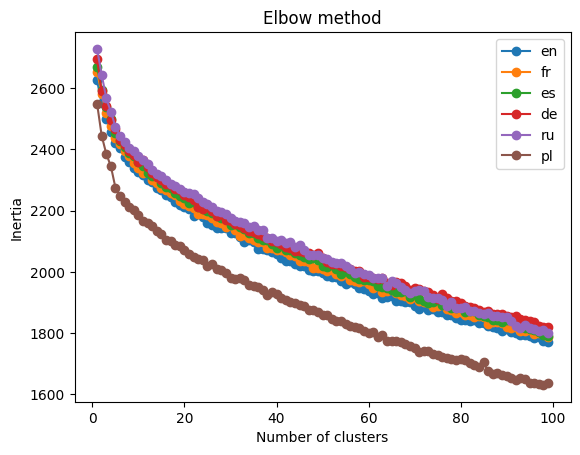

In [ ]:
## plot inertia
for lang, inertia_vals in inertias.items():
    plt.plot(range(1,100), inertias, marker='o', label=lang)

plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()

In [ ]:
## figure out the actual elbow point
for lang, inertia_vals in inertias.items():
    x = range(0, len(inertias))
    kn = KneeLocator(x, inertias, curve='convex', direction='decreasing')
    elbow_point = kn.knee
    print(elbow_point)

AttributeError: 'numpy.ndarray' object has no attribute 'items'

## Actual Clustering

In [ ]:
## cluster based on intertia computed
all_labels = {}
all_data_2d = {}

for lang, embeds in datas.items():
    kmeans = KMeans(n_clusters=elbow_point, random_state=42)
    labels = kmeans.fit_predict(embeds)
    all_labels[lang] = labels
    
    ## show on a plane using pca
    pca = PCA(n_components=2, random_state=42)
    data_2d = pca.fit_transform(embeds)
    all_data_2d[lang] = data_2d

In [1]:
## show on a plane using pca
fig, axes = plt.subplots(1, 5, figsize=(50, 10))

for idx, (lang, data_2d) in enumerate(all_data_2d.items()):
    labels = all_labels[lang]
    
    scatter = axes[idx].scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='tab20', alpha=0.7)
    axes[idx].set_title(f'K-Means Clusters - {lang}')
    axes[idx].set_xlabel('First Principal Component')
    axes[idx].set_ylabel('Second Principal Component')
    plt.colorbar(scatter, ax=axes[idx], label='Cluster')

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
## print out clusters
vocab_en = df["en"]
clusters = {}

for cluster_id in range(elbow_point):
    cluster_indices = np.where(labels == cluster_id)[0]
    clusters[cluster_id] = [vocab_en[i] for i in cluster_indices]

# print all clusters
for cluster_id, words in clusters.items():
    print(f"Cluster {cluster_id}: {words}")

Cluster 0: ['aircraft', 'airline', 'airport', 'alarm', 'alcohol', 'arm', 'armed', 'arms', 'athlete', 'bag', 'balance', 'ball', 'band', 'bank', 'bank', 'bar', 'baseball', 'basketball', 'bath', 'bathroom', 'battery', 'beach', 'bed', 'bedroom', 'beer', 'bicycle', 'bike', 'bill', 'blonde', 'board', 'boat', 'boot', 'bottle', 'box', 'branch', 'brand', 'building', 'bus', 'cable', 'cafe', 'cake', 'car', 'carpet', 'carry', 'case', 'cash', 'cast', 'castle', 'cat', 'cell', 'chain', 'chair', 'champion', 'chocolate', 'church', 'cigarette', 'cinema', 'classroom', 'climb', 'clothes', 'clothing', 'club', 'coal', 'coffee', 'coin', 'collection', 'column', 'concert', 'construction', 'container', 'cook', 'cooker', 'cooking', 'costume', 'course', 'court', 'cross', 'crowd', 'cupboard', 'currency', 'dance', 'dancer', 'dancing', 'device', 'diamond', 'dollar', 'dress', 'dressed', 'drive', 'driving', 'drug', 'electric', 'electrical', 'electricity', 'engine', 'entrance', 'equipment', 'euro', 'expedition', 'facto

In [ ]:
## check cluster sizes
for cluster_id, cluster in clusters.items():
    print(f"Cluster {cluster_id} length: {len(cluster)}")

Cluster 0 length: 396
Cluster 1 length: 285
Cluster 2 length: 634
Cluster 3 length: 274
Cluster 4 length: 196
Cluster 5 length: 168
Cluster 6 length: 155
Cluster 7 length: 111
Cluster 8 length: 312
Cluster 9 length: 176
Cluster 10 length: 165
Cluster 11 length: 95
Cluster 12 length: 241
Cluster 13 length: 284
Cluster 14 length: 260
Cluster 15 length: 97
Cluster 16 length: 353
Cluster 17 length: 246
Cluster 18 length: 182
Cluster 19 length: 366


In [11]:
## save clusters as csv
cluster_df = pd.DataFrame()
for cluster_id, cluster in clusters.items():
    cluster_df[cluster_id] = pd.Series(cluster)
cluster_df.to_csv('clusters.csv', index=False)  

# Sample Items (Test)

In [22]:
for cluster_id, cluster in clusters.items():
    random.seed(42) 
    print(f"Representative from Cluster {cluster_id}: {random.choice(cluster)}")

Representative from Cluster 0: firearm
Representative from Cluster 1: entertain
Representative from Cluster 2: flour
Representative from Cluster 3: discount
Representative from Cluster 4: personnel
Representative from Cluster 5: teens
Representative from Cluster 6: estate
Representative from Cluster 7: equivalent
Representative from Cluster 8: double
Representative from Cluster 9: scope
Representative from Cluster 10: unity
Representative from Cluster 11: revolutionary
Representative from Cluster 12: inclusion
Representative from Cluster 13: giant
Representative from Cluster 14: expression
Representative from Cluster 15: premier
Representative from Cluster 16: publicity
Representative from Cluster 17: epidemic
Representative from Cluster 18: seemingly
Representative from Cluster 19: riot
